In [1]:
## Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
## Importing the dataset

den=pd.read_csv('Dentistry Dataset.csv')

In [4]:
## Checking top 5 records to confirm the importing of the dataset

den.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [5]:
## Lets check the shape of the dataset to see the number of rows and columns that it has

den.shape

## We have 1100 rows and 14 columns in the dataset

(1100, 14)

In [6]:
den.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl No,1100.0,550.500000,317.686953,1.000,275.7500,550.500,825.25000,1100.000
Sample ID,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1100.0,21.625455,2.085892,18.000,20.0000,22.000,23.00000,25.000
inter canine distance intraoral,1100.0,25.989009,1.315292,23.120,25.0000,25.900,26.99250,30.310
intercanine distance casts,1100.0,25.880082,1.862323,6.540,24.9800,25.900,27.00000,30.310
right canine width intraoral,1100.0,6.563000,0.379035,5.460,6.2900,6.520,6.80250,7.610
right canine width casts,1100.0,6.564491,0.377553,5.460,6.3000,6.520,6.80250,7.600
left canine width intraoral,1100.0,6.669627,0.375841,5.460,6.4000,6.660,6.91000,7.810
left canine width casts,1100.0,6.675018,0.377098,5.460,6.4075,6.680,6.92000,7.810
right canine index intra oral,1100.0,0.253122,0.015344,0.223,0.2420,0.253,0.26200,0.363


In [7]:
## Checking the Info to check on the Datatypes for all the columns

den.info()

## All the columns have the correct datatypes. As the Traget Variable " Gender" has an object datatype we will need to convert that to categorical at a later stage/n
## as this is a Classification problem and we need to have the output as Categorical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

<AxesSubplot:>

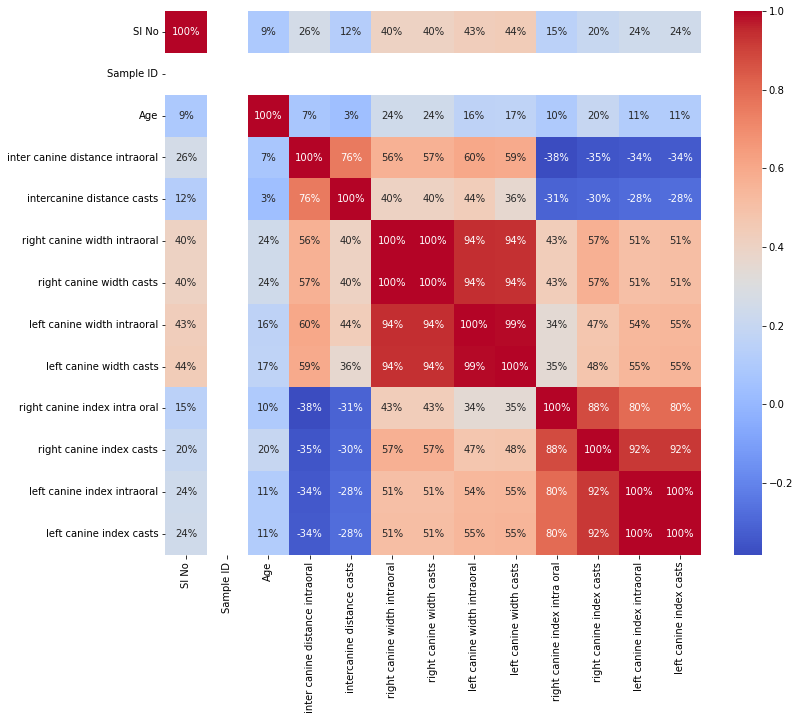

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(den.corr(),annot=True,cmap='coolwarm',fmt='.0%')

In [9]:
##When checking the column sample id we can see that there is no data in the column and hence it will be removed during the feature engineering
#dentist['Sample ID']

In [10]:
## Let's check the Nan Values present in each feature
## Make a features list which has missing values
## Print the feature name and the % of missing values

features_with_na=[features for features in den.columns if den[features].isnull().sum()>1]
for features in features_with_na:
    print(features,np.round(den[features].isnull().mean(),4),'% missing values')
    
## Only sample ID has the missing values which are 1% of the total dataset

Sample ID 1.0 % missing values


In [11]:
den.columns

Index(['Sl No', 'Sample ID', 'Age', 'Gender',
       'inter canine distance intraoral', 'intercanine distance casts',
       'right canine width intraoral', 'right canine width casts',
       'left canine width intraoral', 'left canine width casts',
       'right canine index intra oral', 'right canine index casts',
       'left canine index intraoral', 'left canine index casts'],
      dtype='object')

In [12]:
#dentist=dentist.drop(['Sl No','Age','Sample ID'],axis=1)

In [13]:
#dentist['right canine width intraoral']

In [14]:
## Sample ID column has been removed from the dataset and it now has no null values
den.isnull().sum()

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

In [15]:
## Checking for Numerical Features

numerical_feature=[feature for feature in den.columns if den[feature].dtypes!='O']
print('Number of Numerical Features:', len(numerical_feature))

Number of Numerical Features: 13


In [16]:
numerical_feature

['Sl No',
 'Sample ID',
 'Age',
 'inter canine distance intraoral',
 'intercanine distance casts',
 'right canine width intraoral',
 'right canine width casts',
 'left canine width intraoral',
 'left canine width casts',
 'right canine index intra oral',
 'right canine index casts',
 'left canine index intraoral',
 'left canine index casts']

## OUTLIER CHECKING AND TREATMENT

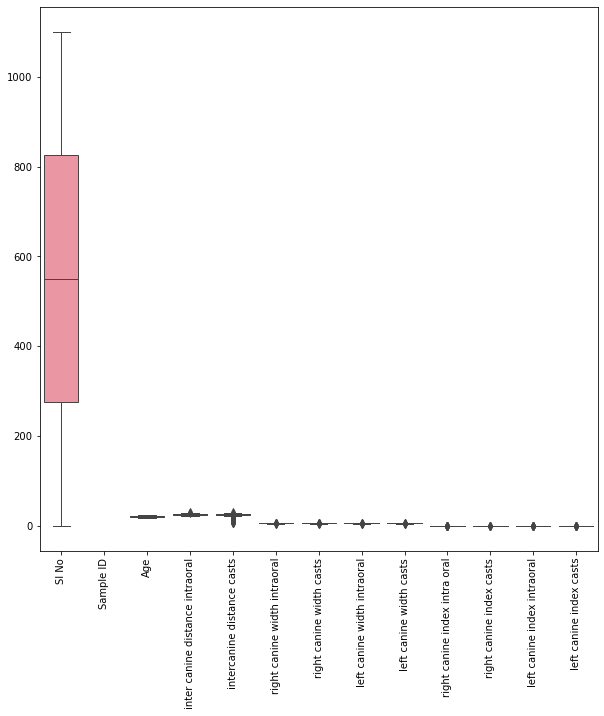

In [17]:
## Outlier Detection
fig= plt.figure(figsize=(10,10))
sns.boxplot(data= den, linewidth=1 )
plt.xticks(rotation='vertical')
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
den['Gender'] = label.fit_transform(den['Gender'])

In [19]:
den.columns

Index(['Sl No', 'Sample ID', 'Age', 'Gender',
       'inter canine distance intraoral', 'intercanine distance casts',
       'right canine width intraoral', 'right canine width casts',
       'left canine width intraoral', 'left canine width casts',
       'right canine index intra oral', 'right canine index casts',
       'left canine index intraoral', 'left canine index casts'],
      dtype='object')

In [20]:
den['Gender']= den['Gender'].astype(int)

In [21]:
## USING IQR to remove the outliers

def outliers(df,ft):
    
    Q1= df[ft].quantile(0.25)
    Q3= df[ft].quantile(0.75)
    
    IQR= Q3-Q1
    
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR
    
    ls= df.index[(df[ft] < lower_bound)| (df[ft] > upper_bound)]
    return ls

In [22]:
def remove(den,ls):
    ls=sorted(set(ls))
    den=den.drop(ls)
    return den

In [23]:
index_list=[]
for feature in ['Sl No', 'Sample ID', 'Age', 'Gender',
       'inter canine distance intraoral', 'intercanine distance casts',
       'right canine width intraoral', 'right canine width casts',
       'left canine width intraoral', 'left canine width casts',
       'right canine index intra oral', 'right canine index casts',
       'left canine index intraoral', 'left canine index casts']:
    index_list.extend(outliers(den,feature))

In [24]:
den=den.drop(['Sl No','Sample ID'],axis=1)

In [25]:
den=remove(den,index_list)

In [26]:
den.shape

(1054, 12)

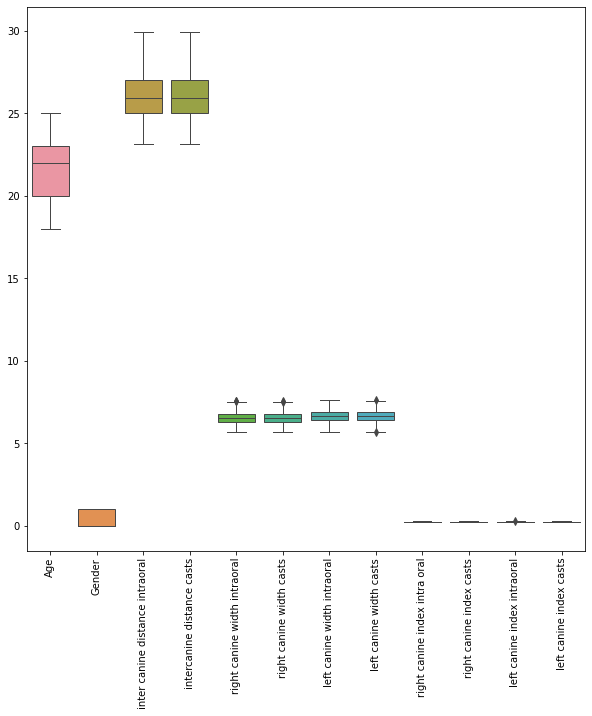

In [27]:
## Outlier Detection
fig= plt.figure(figsize=(10,10))
sns.boxplot(data= den, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

In [28]:
## Checking for the Target Variable to see if the data is balanced or Imbalanced

den['Gender'].value_counts()

## We can see that the data is completely balanced

0    537
1    517
Name: Gender, dtype: int64

In [29]:
## Coverting back the Gender to categorical
den['Gender']=den['Gender'].astype('category')

In [30]:
den.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [31]:
den['Gender'].dtypes

## The data type has been converted to Categorical

CategoricalDtype(categories=[0, 1], ordered=False)

In [32]:
den['Gender']

0       0
1       0
2       0
3       0
4       0
       ..
1095    1
1096    1
1097    1
1098    1
1099    1
Name: Gender, Length: 1054, dtype: category
Categories (2, int64): [0, 1]

<AxesSubplot:>

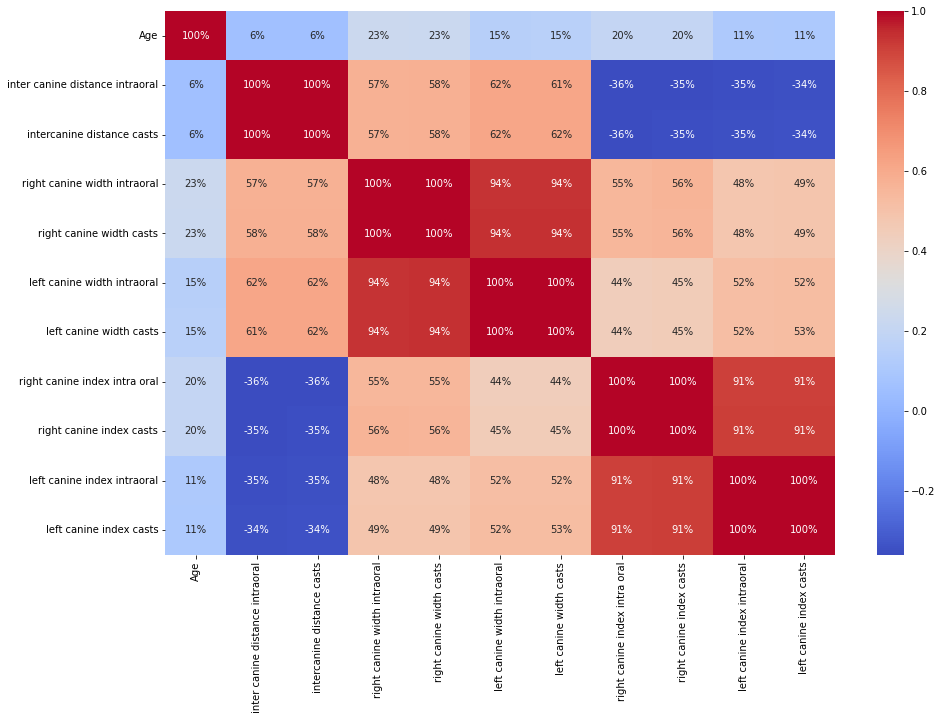

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(den.corr(),annot=True,cmap='coolwarm',fmt='.0%')

In [34]:
## Splitting the Data into X and y

X=den.drop(['Gender'],axis=1)
y=den['Gender']

In [35]:
## Using the Chi-Sqyare test to check which columsn can be removed

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [36]:
select_kbest_rank_features= SelectKBest(score_func= chi2, k=7)
kbest_features= select_kbest_rank_features.fit(X,y)

df_kscore= pd.DataFrame(kbest_features.scores_,columns=['Score'])
df_columns= pd.DataFrame(X.columns)

kbest_features_rank= pd.concat([df_kscore, df_columns], axis=1)
kbest_features_rank.columns= ['k_score', 'features']

kbest_features_rank
print(kbest_features_rank.sort_values(by='k_score', ascending= False))

     k_score                         features
1   7.900367  inter canine distance intraoral
2   7.887240       intercanine distance casts
6   7.845754          left canine width casts
5   7.769406      left canine width intraoral
3   6.312793     right canine width intraoral
4   6.266119         right canine width casts
0   2.554583                              Age
10  0.074146          left canine index casts
9   0.072563      left canine index intraoral
8   0.046670         right canine index casts
7   0.046227    right canine index intra oral


## MODEL BUILDING AFTER USING STANDARDIZATION

In [37]:
## Importing the Train Test Split

from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [39]:
## Performing the Standardization on the X train to get the data into a similar scale

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [40]:
scaled_X_train=sc.fit_transform(X_train)
scaled_X_test=sc.fit_transform(X_test)

In [41]:
## Importing the Logistic Regression Algorithm as this is a classification problem

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [42]:
## Fitting the X_train and y_train in the Model

model1=lr.fit(scaled_X_train,y_train)

In [43]:
## Predicting using Model

y_pred=model1.predict(scaled_X_test)

In [44]:
#y_pred_df=pd.DataFrame(y_pred)

In [45]:
## Evaluating using the Accuracy as this is a classification problem

from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       112
           1       0.73      0.74      0.73        99

    accuracy                           0.75       211
   macro avg       0.75      0.75      0.75       211
weighted avg       0.75      0.75      0.75       211



In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
cm1=confusion_matrix(y_test,y_pred)

In [48]:
cm1

array([[85, 26],
       [27, 73]], dtype=int64)

In [49]:
## Running the Model with Random Forest

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()



In [50]:
## Fitting the X_train and Y_train on the model

model2=rf.fit(scaled_X_train,y_train)

In [51]:
y_pred_mod2=rf.predict(scaled_X_test)

In [52]:
print(classification_report(y_test,y_pred_mod2))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       111
           1       0.83      0.83      0.83       100

    accuracy                           0.84       211
   macro avg       0.84      0.84      0.84       211
weighted avg       0.84      0.84      0.84       211



In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
cm=confusion_matrix(y_pred_mod2,y_pred)

In [55]:
cm

array([[95, 16],
       [17, 83]], dtype=int64)

In [56]:
## Running the Model with Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [57]:
## Fitting the X_train and Y_train on the model

model3=dt.fit(scaled_X_train,y_train)

In [58]:
y_pred_mod3=dt.predict(scaled_X_test)

In [59]:
print(classification_report(y_test,y_pred_mod3))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       111
           1       0.76      0.76      0.76       100

    accuracy                           0.77       211
   macro avg       0.77      0.77      0.77       211
weighted avg       0.77      0.77      0.77       211



In [60]:
cm3=confusion_matrix(y_pred_mod3,y_pred)

In [61]:
cm3

array([[89, 22],
       [23, 77]], dtype=int64)

In [62]:
## KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
    

In [63]:
model4=KNeighborsClassifier(n_neighbors=14)

In [64]:
model4.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [65]:
y_pred_knn=model4.predict(scaled_X_test)

In [66]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       111
           1       0.86      0.77      0.81       100

    accuracy                           0.83       211
   macro avg       0.83      0.83      0.83       211
weighted avg       0.83      0.83      0.83       211



In [67]:
cm4=confusion_matrix(y_pred_knn,y_pred)

In [68]:
cm4

array([[98, 23],
       [14, 76]], dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
test_error_rates=[]
for k in range(1,30):
    model5=KNeighborsClassifier(n_neighbors=k)
    model5.fit(scaled_X_train,y_train)
    y_pred_test=model5.predict(scaled_X_test)
    test_error=1-accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [71]:
#test_error_rates

Text(0.5, 0, 'K Neighbors')

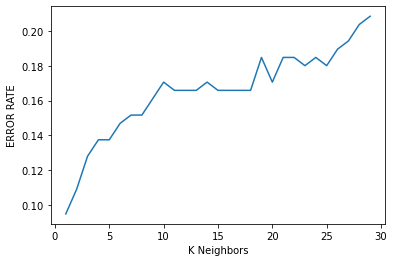

In [72]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K Neighbors')

In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
gb=GaussianNB()

In [75]:
model5=gb.fit(scaled_X_train,y_train)

In [76]:
y_pred_mod5=dt.predict(scaled_X_test)

In [77]:
print(classification_report(y_test,y_pred_mod5))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       111
           1       0.76      0.76      0.76       100

    accuracy                           0.77       211
   macro avg       0.77      0.77      0.77       211
weighted avg       0.77      0.77      0.77       211



In [78]:
cm5=confusion_matrix(y_pred_mod5,y_pred)

In [79]:
cm5

array([[89, 22],
       [23, 77]], dtype=int64)

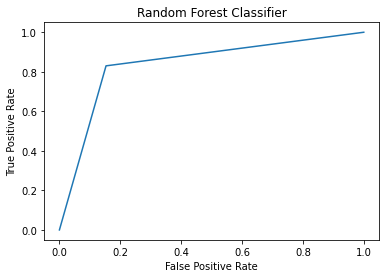

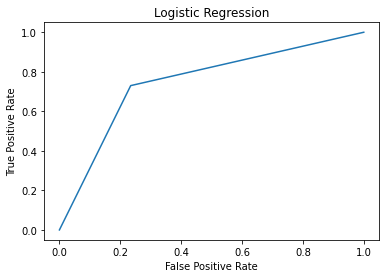

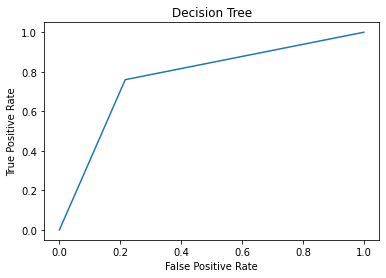

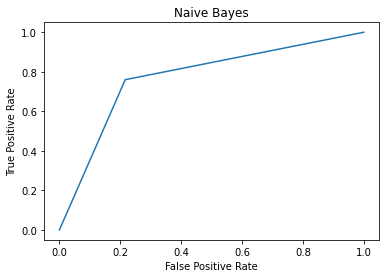

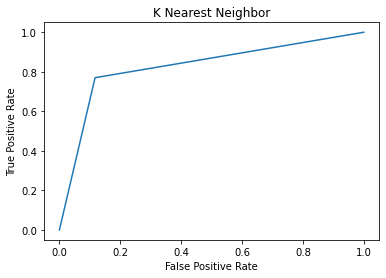

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

FPR,TPR,_=roc_curve(y_test,y_pred_mod2)
plt.plot(FPR,TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

FPR,TPR,_=roc_curve(y_test,y_pred)
plt.plot(FPR,TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression')
plt.show()

FPR,TPR,_=roc_curve(y_test,y_pred_mod3)
plt.plot(FPR,TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Decision Tree')
plt.show()

FPR,TPR,_=roc_curve(y_test,y_pred_mod5)
plt.plot(FPR,TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Naive Bayes')
plt.show()

FPR,TPR,_=roc_curve(y_test,y_pred_knn)
plt.plot(FPR,TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('K Nearest Neighbor')
plt.show()